In [1]:
import findspark
findspark.init()

# configure spark variables
from pyspark.context import SparkContext
from pyspark import SparkConf
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
   
sc = SparkContext().getOrCreate(SparkConf().setMaster("local[4]"))
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

# load up other dependencies
import re
import pandas as pd

In [2]:
m = re.finditer(r'.*?(spark).*?', "I'm searching for a spark in PySpark", re.I)
for match in m:
    print(match, match.start(), match.end())

<re.Match object; span=(0, 25), match="I'm searching for a spark"> 0 25
<re.Match object; span=(25, 36), match=' in PySpark'> 25 36


In [3]:
raw_data_files = ['/home/spark/files/access_log1', '/home/spark/files/access_log2']
base_df = spark.read.text(raw_data_files)
base_df.printSchema()

root
 |-- value: string (nullable = true)



In [4]:
type(base_df)

pyspark.sql.dataframe.DataFrame

In [5]:
base_df_rdd = base_df.rdd
type(base_df_rdd)

pyspark.rdd.RDD

In [6]:
base_df.show(10, truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|2001:6d8:10:4400:451:aebb:715b:b6df - - [10/Nov/2019:03:44:13 +0100] "GET /wpad.dat HTTP/1.1" 304 - "-" "-"                                                                                                                          |
|2001:6d8:10:4400::1:100b - - [10/Nov/2019:03:44:13 +0100] "GET /wpad.da

In [7]:
base_df_rdd.take(10)

[Row(value='2001:6d8:10:4400:451:aebb:715b:b6df - - [10/Nov/2019:03:44:13 +0100] "GET /wpad.dat HTTP/1.1" 304 - "-" "-"'),
 Row(value='2001:6d8:10:4400::1:100b - - [10/Nov/2019:03:44:13 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80.0.0.0 Safari/537.36"'),
 Row(value='172.30.254.52 - - [10/Nov/2019:03:44:15 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80.0.0.0 Safari/537.36"'),
 Row(value='2001:6d8:10:4400::1:100b - - [10/Nov/2019:03:44:21 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80.0.0.0 Safari/537.36"'),
 Row(value='172.30.254.52 - - [10/Nov/2019:03:44:23 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (K

In [8]:
print((base_df.count(), len(base_df.columns)))

(285061, 1)


In [9]:
sample_logs = [item['value'] for item in base_df.take(15)]
sample_logs


['2001:6d8:10:4400:451:aebb:715b:b6df - - [10/Nov/2019:03:44:13 +0100] "GET /wpad.dat HTTP/1.1" 304 - "-" "-"',
 '2001:6d8:10:4400::1:100b - - [10/Nov/2019:03:44:13 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80.0.0.0 Safari/537.36"',
 '172.30.254.52 - - [10/Nov/2019:03:44:15 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80.0.0.0 Safari/537.36"',
 '2001:6d8:10:4400::1:100b - - [10/Nov/2019:03:44:21 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80.0.0.0 Safari/537.36"',
 '172.30.254.52 - - [10/Nov/2019:03:44:23 +0100] "GET /wpad.dat HTTP/1.1" 200 137 "-" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ReaderServices/19.12.20036 Chrome/80

In [10]:
host_pattern = r'(^\S+)\s'
hosts = [re.search(host_pattern, item).group(1)
           if re.search(host_pattern, item)
           else 'no match'
           for item in sample_logs]
hosts

['2001:6d8:10:4400:451:aebb:715b:b6df',
 '2001:6d8:10:4400::1:100b',
 '172.30.254.52',
 '2001:6d8:10:4400::1:100b',
 '172.30.254.52',
 '2001:6d8:10:4401:58:1a77:a67:aaef',
 '2001:6d8:10:4400::1:100b',
 '172.30.254.52',
 '2001:6d8:10:4400:b59f:6067:d7c5:2b84',
 '2001:6d8:10:4400::1:100b',
 '2001:6d8:10:4400:b59f:6067:d7c5:2b84',
 '172.30.254.52',
 '2001:6d8:10:4400:b59f:6067:d7c5:2b84',
 '2001:6d8:10:4400:5146:1e50:99:5f7b',
 '2001:6d8:10:4400:b59f:6067:d7c5:2b84']

In [11]:
ts_pattern = r'\[(\d{2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} \S{1}\d{4})]'
timestamps = [re.search(ts_pattern, item).group(1) 
                 if re.search(ts_pattern, item)
                 else 'no match'
                 for item in sample_logs]
timestamps

['10/Nov/2019:03:44:13 +0100',
 '10/Nov/2019:03:44:13 +0100',
 '10/Nov/2019:03:44:15 +0100',
 '10/Nov/2019:03:44:21 +0100',
 '10/Nov/2019:03:44:23 +0100',
 '10/Nov/2019:03:44:28 +0100',
 '10/Nov/2019:03:44:29 +0100',
 '10/Nov/2019:03:44:31 +0100',
 '10/Nov/2019:03:44:32 +0100',
 '10/Nov/2019:03:44:37 +0100',
 '10/Nov/2019:03:44:39 +0100',
 '10/Nov/2019:03:44:39 +0100',
 '10/Nov/2019:03:44:40 +0100',
 '10/Nov/2019:03:44:41 +0100',
 '10/Nov/2019:03:44:41 +0100']

In [12]:
method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
               if re.search(method_uri_protocol_pattern, item)
               else 'no match'
              for item in sample_logs]
method_uri_protocol

[('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1'),
 ('GET', '/wpad.dat', 'HTTP/1.1')]

In [13]:
from pyspark.sql.functions import regexp_extract

logs_df = base_df.select(regexp_extract('value', r'(^[\S+]+) -', 1).alias('host'),
                          regexp_extract('value', r'(^[\S+]+) - - \[(.*)\]', 2).alias('timestamp'),
                          regexp_extract('value', r'(^[\S+]+) - - \[(.*)\] "(\w+)', 3).alias('method'),
                          regexp_extract('value', r'(^[\S+]+) - - \[(.*)\] "(\w+) (.*?) (.*?)', 4).alias('path'),
                          regexp_extract('value', r'(^[\S+]+) - - \[(.*) \+(.*)\] "(\w+) (.*?) (.*?)" ', 6).alias('protocol'),
                          regexp_extract('value', r'(^[\S+]+) - - \[(.*) \+(.*)\] "(\w+) (.*?) (.*?)" (\d+) ', 7).cast('integer').alias('code'),
                          regexp_extract('value', r'(^[\S+]+) - - \[(.*) \+(.*)\] "(\w+) (.*?) (.*?)" (\d+) (\d+)', 8).cast('integer').alias('size'))
logs_df.show(10, truncate=True)
print((logs_df.count(), len(logs_df.columns)))

+--------------------+--------------------+------+---------+--------+----+----+
|                host|           timestamp|method|     path|protocol|code|size|
+--------------------+--------------------+------+---------+--------+----+----+
|2001:6d8:10:4400:...|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 304|null|
|2001:6d8:10:4400:...|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 200| 137|
|       172.30.254.52|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 200| 137|
|2001:6d8:10:4400:...|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 200| 137|
|       172.30.254.52|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 200| 137|
|2001:6d8:10:4401:...|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 304|null|
|2001:6d8:10:4400:...|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 200| 137|
|       172.30.254.52|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 200| 137|
|2001:6d8:10:4400:...|10/Nov/2019:03:44...|   GET|/wpad.dat|HTTP/1.1| 304|null|
|2001:6d8:10:4400:...|10/Nov/2019:03:44.

In [14]:
(base_df
    .filter(base_df['value']
                .isNull())
    .count())

0

In [15]:
bad_rows_df = logs_df.filter(logs_df['host'].isNull()|
#                             logs_df['timestamp'].isNull() |
#                             logs_df['method'].isNull() |
#                             logs_df['path'].isNull() |
                             logs_df['code'].isNull() |
                             logs_df['size'].isNull()|
                             logs_df['protocol'].isNull())
bad_rows_df.count()

175714

In [16]:
logs_df = logs_df.na.fill({'size': 0})
bad_rows_df.count()

175714

In [17]:
from pyspark.sql.functions import udf

month_map = {
  'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
  'Aug':8,  'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec': 12
}

def parse_clf_time(text):
    """ Convert Common Log time format into a Python datetime object
    Args:
        text (str): date and time in Apache time format [dd/mmm/yyyy:hh:mm:ss (+/-)zzzz]
    Returns:
        a string suitable for passing to CAST('timestamp')
    """
    # NOTE: We're ignoring the time zones here, might need to be handled depending on the problem you are solving
    return "{0:04d}-{1:02d}-{2:02d} {3:02d}:{4:02d}:{5:02d}".format(
      int(text[7:11]),
      month_map[text[3:6]],
      int(text[0:2]),
      int(text[12:14]),
      int(text[15:17]),
      int(text[18:20])
    )

In [18]:
udf_parse_time = udf(parse_clf_time)

logs_df = (logs_df.select('*', udf_parse_time(logs_df['timestamp'])
                                   .cast('timestamp')
                                   .alias('time'))
                                   .drop('timestamp'))

In [19]:
logs_df.printSchema()

root
 |-- host: string (nullable = true)
 |-- method: string (nullable = true)
 |-- path: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- code: integer (nullable = true)
 |-- size: integer (nullable = false)
 |-- time: timestamp (nullable = true)



In [20]:
import numpy as np
import pandas as pd

In [21]:
content_size_summary_df = logs_df.describe(['size'])

In [22]:
content_size_summary_df.toPandas()

,summary,size
0,count,285061
1,mean,4638.948316325278
2,stddev,360584.8484784877
3,min,0
4,max,82117397


In [23]:
from pyspark.sql import functions as F

(logs_df.agg(F.min(logs_df['size']).alias('min_content_size'),
             F.max(logs_df['size']).alias('max_content_size'),
             F.mean(logs_df['size']).alias('mean_content_size'),
             F.stddev(logs_df['size']).alias('std_content_size'),
             F.count(logs_df['size']).alias('count_content_size'))
        .toPandas())

,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,0,82117397,4638.948316,360584.848478,285061


In [24]:
status_freq_df = (logs_df
                     .groupBy('code')
                     .count()
                     .sort('code')
                     .cache())
print('Total distinct HTTP Status Codes:', status_freq_df.count()) 

Total distinct HTTP Status Codes: 10


In [25]:
status_freq_pd_df = (status_freq_df
                         .toPandas()
                         .sort_values(by=['count'],
                                      ascending=False))
status_freq_pd_df

,code,count
5,304.0,172698
1,200.0,108149
0,NaN,2068
9,404.0,1450
7,401.0,508
2,206.0,65
3,301.0,52
8,403.0,37
4,302.0,33
6,400.0,1


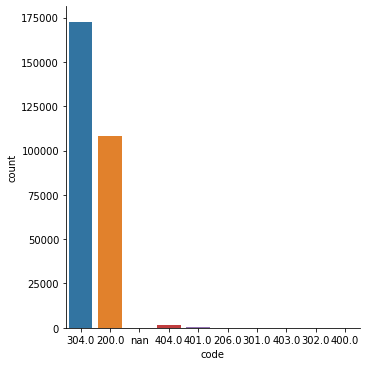

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='code', y='count', data=status_freq_pd_df,
            kind='bar', order=status_freq_pd_df['code'])

In [27]:
log_freq_df = status_freq_df.withColumn('log(count)',
                                        F.log(status_freq_df['count']))
log_freq_df.show()

+----+------+------------------+
|code| count|        log(count)|
+----+------+------------------+
|null|  2068|  7.63433723562832|
| 200|108149|11.591265184921443|
| 206|    65| 4.174387269895637|
| 301|    52|3.9512437185814275|
| 302|    33|3.4965075614664802|
| 304|172698|12.059299683291801|
| 400|     1|               0.0|
| 401|   508| 6.230481447578482|
| 403|    37|3.6109179126442243|
| 404|  1450|  7.27931883541462|
+----+------+------------------+



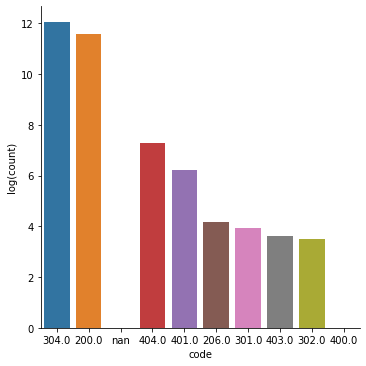

In [28]:
log_freq_pd_df = (log_freq_df
                    .toPandas()
                    .sort_values(by=['log(count)'],
                                 ascending=False))
sns.catplot(x='code', y='log(count)', data=log_freq_pd_df,
            kind='bar', order=status_freq_pd_df['code'])